# Classification problem: Predict Loan Repayment


In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender would make profit from the interest. However, if the borrower fails to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan. In this study, the data from Lending club is used to train several Machine Learning models to determine if the borrower has the ability to repay its loan. In addition, we would analyze the performance of the models.

## 1. Load Libraries
Pandas, Numpy and Sklearn are key libraries to develop the models.

In [715]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## 2. Load the dataset

In [635]:
df_raw=pd.read_csv("accepted.csv")

/Users/mjcobosf/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 3. Reduce dataset for better computation

In [716]:
# 1% of the data without replacement
df = df_raw.sample(frac=0.01, replace=False, random_state=123)  

In [717]:
df.shape

(22607, 151)

## 3. Data Wrangling

In [120]:
#df.info(verbose=True, null_counts=True)

In [718]:
#Turn loan_status variable into a binary categorical (1 and 0)

df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']].head()

loan_repaid  loan_status
694363           0.0  Charged Off
471099           1.0   Fully Paid
497651           NaN      Current
1424167          NaN      Current
1886646          1.0   Fully Paid

In [719]:
# After mapping values, drop nulls and loan_status variable
df=df.dropna(subset=['loan_repaid'])
df=df.drop('loan_status',axis=1)

In [245]:
pd.options.display.max_rows = 1000
df.head().T

In [ ]:
df.info(verbose=True, null_counts=True)

In [720]:
#Drop object dtype variables, which are not meaningful variables for credit repayment prediction
df=df.drop([
'id',
'member_id',
'url',
'zip_code',
'desc',
'funded_amnt',
'installment', 
'fico_range_low',
'pymnt_plan',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_amnt',
'last_fico_range_high',
'last_fico_range_low',
'collections_12_mths_ex_med',
'mths_since_last_major_derog',
'policy_code',
'acc_now_delinq',
'tot_coll_amt',
'tot_cur_bal',
'open_act_il',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
#'bc_open_to_buy',
#'bc_util',
'chargeoff_within_12_mths',
'delinq_amnt',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
#'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'deferral_term',
 'hardship_amount',
 'hardship_length',
 'hardship_dpd',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'],axis=1)

In [721]:
#Drop float64 dtype variables, which are not meaningful variables for credit repayment prediction
df=df.drop([
'issue_d',
'funded_amnt_inv',
'title',
'addr_state',
'last_pymnt_d',
'next_pymnt_d',
'last_credit_pull_d',
'sec_app_earliest_cr_line',
'hardship_flag',
'hardship_type',
'hardship_status',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_loan_status',
'disbursement_method',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'hardship_reason'], axis=1)

In [722]:
len(list(df.columns))

37

In [723]:
for i in df:
      print("{} : {} unique values".format(i, df[i].nunique()))

loan_amnt : 1007 unique values
term : 2 unique values
int_rate : 458 unique values
grade : 7 unique values
sub_grade : 35 unique values
emp_title : 8024 unique values
emp_length : 11 unique values
home_ownership : 5 unique values
annual_inc : 1861 unique values
verification_status : 3 unique values
purpose : 14 unique values
dti : 3479 unique values
delinq_2yrs : 16 unique values
earliest_cr_line : 546 unique values
fico_range_high : 38 unique values
inq_last_6mths : 8 unique values
mths_since_last_delinq : 97 unique values
mths_since_last_record : 121 unique values
open_acc : 44 unique values
pub_rec : 14 unique values
revol_bal : 10943 unique values
revol_util : 1031 unique values
total_acc : 86 unique values
initial_list_status : 2 unique values
application_type : 2 unique values
annual_inc_joint : 190 unique values
dti_joint : 251 unique values
verification_status_joint : 3 unique values
open_acc_6m : 13 unique values
open_rv_12m : 17 unique values
bc_open_to_buy : 8877 unique valu

In [724]:
print(len(df))

13491


In [45]:
#df.isnull().sum()

In [46]:
#This code let us count values
#for i in df.select_dtypes(include=['float64']).columns:
      # print("{}\n{}\n".format(i, df[i].value_counts()))
    
#for i in df.select_dtypes(include=['object']).columns:
   # print("{}\n{}\n".format(i, df[i].value_counts()))

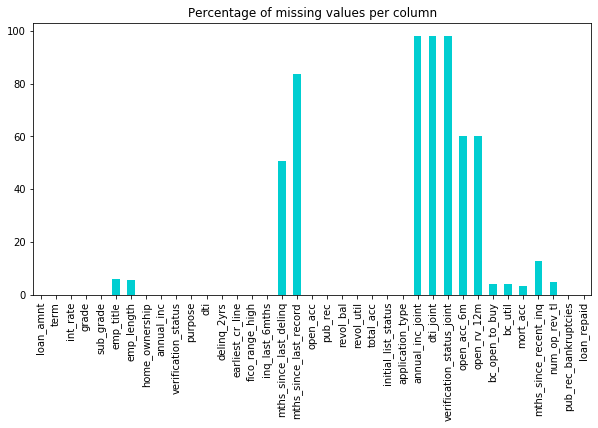

In [725]:
#Let's print the missing values for every column
plt.figure(figsize=(10,5))
((df.isnull().sum())/len(df)*100).plot.bar(title='Percentage of missing values per column', color='darkturquoise')

In [726]:
#There are almost 100% of null values from some variables I picked out from the very beginning, so let's drop them.
df=df.drop([
'mths_since_last_delinq',
'mths_since_last_record',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'open_acc_6m',
'open_rv_12m'], axis=1)

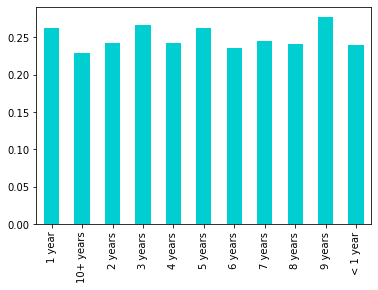

In [727]:
#let's see what how is the distribution is for emp_length categories given loan repaid, 
#so make a decision whether keep or drop them.

per_charge_off = df[df['loan_repaid'] == 0]['emp_length'].value_counts()/df[df['loan_repaid'] == 1]['emp_length'].value_counts()
per_charge_off.plot.bar(color='darkturquoise')


In [728]:
##So it looks like regardless of what actual employment length, about 20% of borrowers don't pay back the loan, 
##so this is not a useful variable
df = df.drop('emp_length', axis=1)

In [729]:
##Now, for emp_title, there are 2k of na, an almost impossible work to impute/replace na's with 8k unique values.
print(df['emp_title'].nunique())

8024


In [730]:
##it is almost impossible to treat them and turn into a dummy variable, so let's drop it
df = df.drop('emp_title', axis=1)

In [731]:
## Let's see how many null values are left
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                         4
delinq_2yrs                 0
earliest_cr_line            0
fico_range_high             0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  3
total_acc                   0
initial_list_status         0
application_type            0
bc_open_to_buy            557
bc_util                   565
mort_acc                  437
mths_since_recent_inq    1733
num_op_rev_tl             643
pub_rec_bankruptcies        6
loan_repaid                 0
dtype: int64

In [732]:
## mont_acc has almost 1k null values. Let's impute with the mean of total_acc, that is the current number of credit lines 
## in the borrower's credit line

total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [739]:
## for the rest of variables with less than 10 na, let's drop them
df = df.dropna(subset=['dti','revol_util','pub_rec_bankruptcies'])

In [740]:
##For the rest of missing values, I am going to use SimpleImputer (median), I cannot drop them.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
fico_range_high             0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
bc_open_to_buy            549
bc_util                   556
mort_acc                    0
mths_since_recent_inq    1726
num_op_rev_tl             637
pub_rec_bankruptcies        0
loan_repaid                 0
dtype: int64

In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13478 entries, 694363 to 163701
Data columns (total 28 columns):
loan_amnt                13478 non-null float64
term                     13478 non-null object
int_rate                 13478 non-null float64
grade                    13478 non-null object
sub_grade                13478 non-null object
home_ownership           13478 non-null object
annual_inc               13478 non-null float64
verification_status      13478 non-null object
purpose                  13478 non-null object
dti                      13478 non-null float64
delinq_2yrs              13478 non-null float64
earliest_cr_line         13478 non-null object
fico_range_high          13478 non-null float64
inq_last_6mths           13478 non-null float64
open_acc                 13478 non-null float64
pub_rec                  13478 non-null float64
revol_bal                13478 non-null float64
revol_util               13478 non-null float64
total_acc                134

In [742]:
#We already know grade is part of sub_grade, so just drop the grade feature
df = df.drop('grade', axis=1)

In [743]:
## Geat earliest_cr_year from earliest_cr_line
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [744]:
## Transform term object to a numerical variable.
df['term'] = df['term'].apply(lambda term: int(term[:3]))
print(df['term'].value_counts())

36    10196
60     3282
Name: term, dtype: int64


# 4. Descriptive Statistics

This step should have done before data wrangling, but the data was extremely large, so it was needed other treatment in order
to make descriptive statistics step smoothly.

### Feature Analysis: A short description of each feature in the data set:
1. loan_amnt: The listed amount of the loan applied for by the borrower. 
2. term: The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate: Interest Rate on the loan
4. sub_grade: Loan Club assigned loan subgrade
5. home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. 
6. annual_inc: The self-reported annual income provided by the borrower during registration.
7. verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
8. purpose: A category provided by the borrower for the loan request. 
9. dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding 
     mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
10. delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
11. earliest_cr_line: The month the borrower's earliest reported credit line was opened
12. fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to.
13. inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
14. open_acc: The number of open credit lines in the borrower's credit file.
15. pub_rec: Number of derogatory public records
16. revol_bal: Total credit revolving balance
17. revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
18. total_acc: The total number of credit lines currently in the borrower's credit file
19. initial_list_status: The initial listing status of the loan. Possible values are – W, F
20. application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
21. mort_acc: Number of mortgage accounts.
22. pub_rec_bankruptcies: Number of public record bankruptcies
23. loan_repaid: Current status of the loan
24. bc_open_to_buy: Total open to buy on revolving bankcards.
25. bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.  
26. mths_since_recent_inq: Months since most recent inquiry.
27. num_op_rev_tl: Number of open revolving accounts 


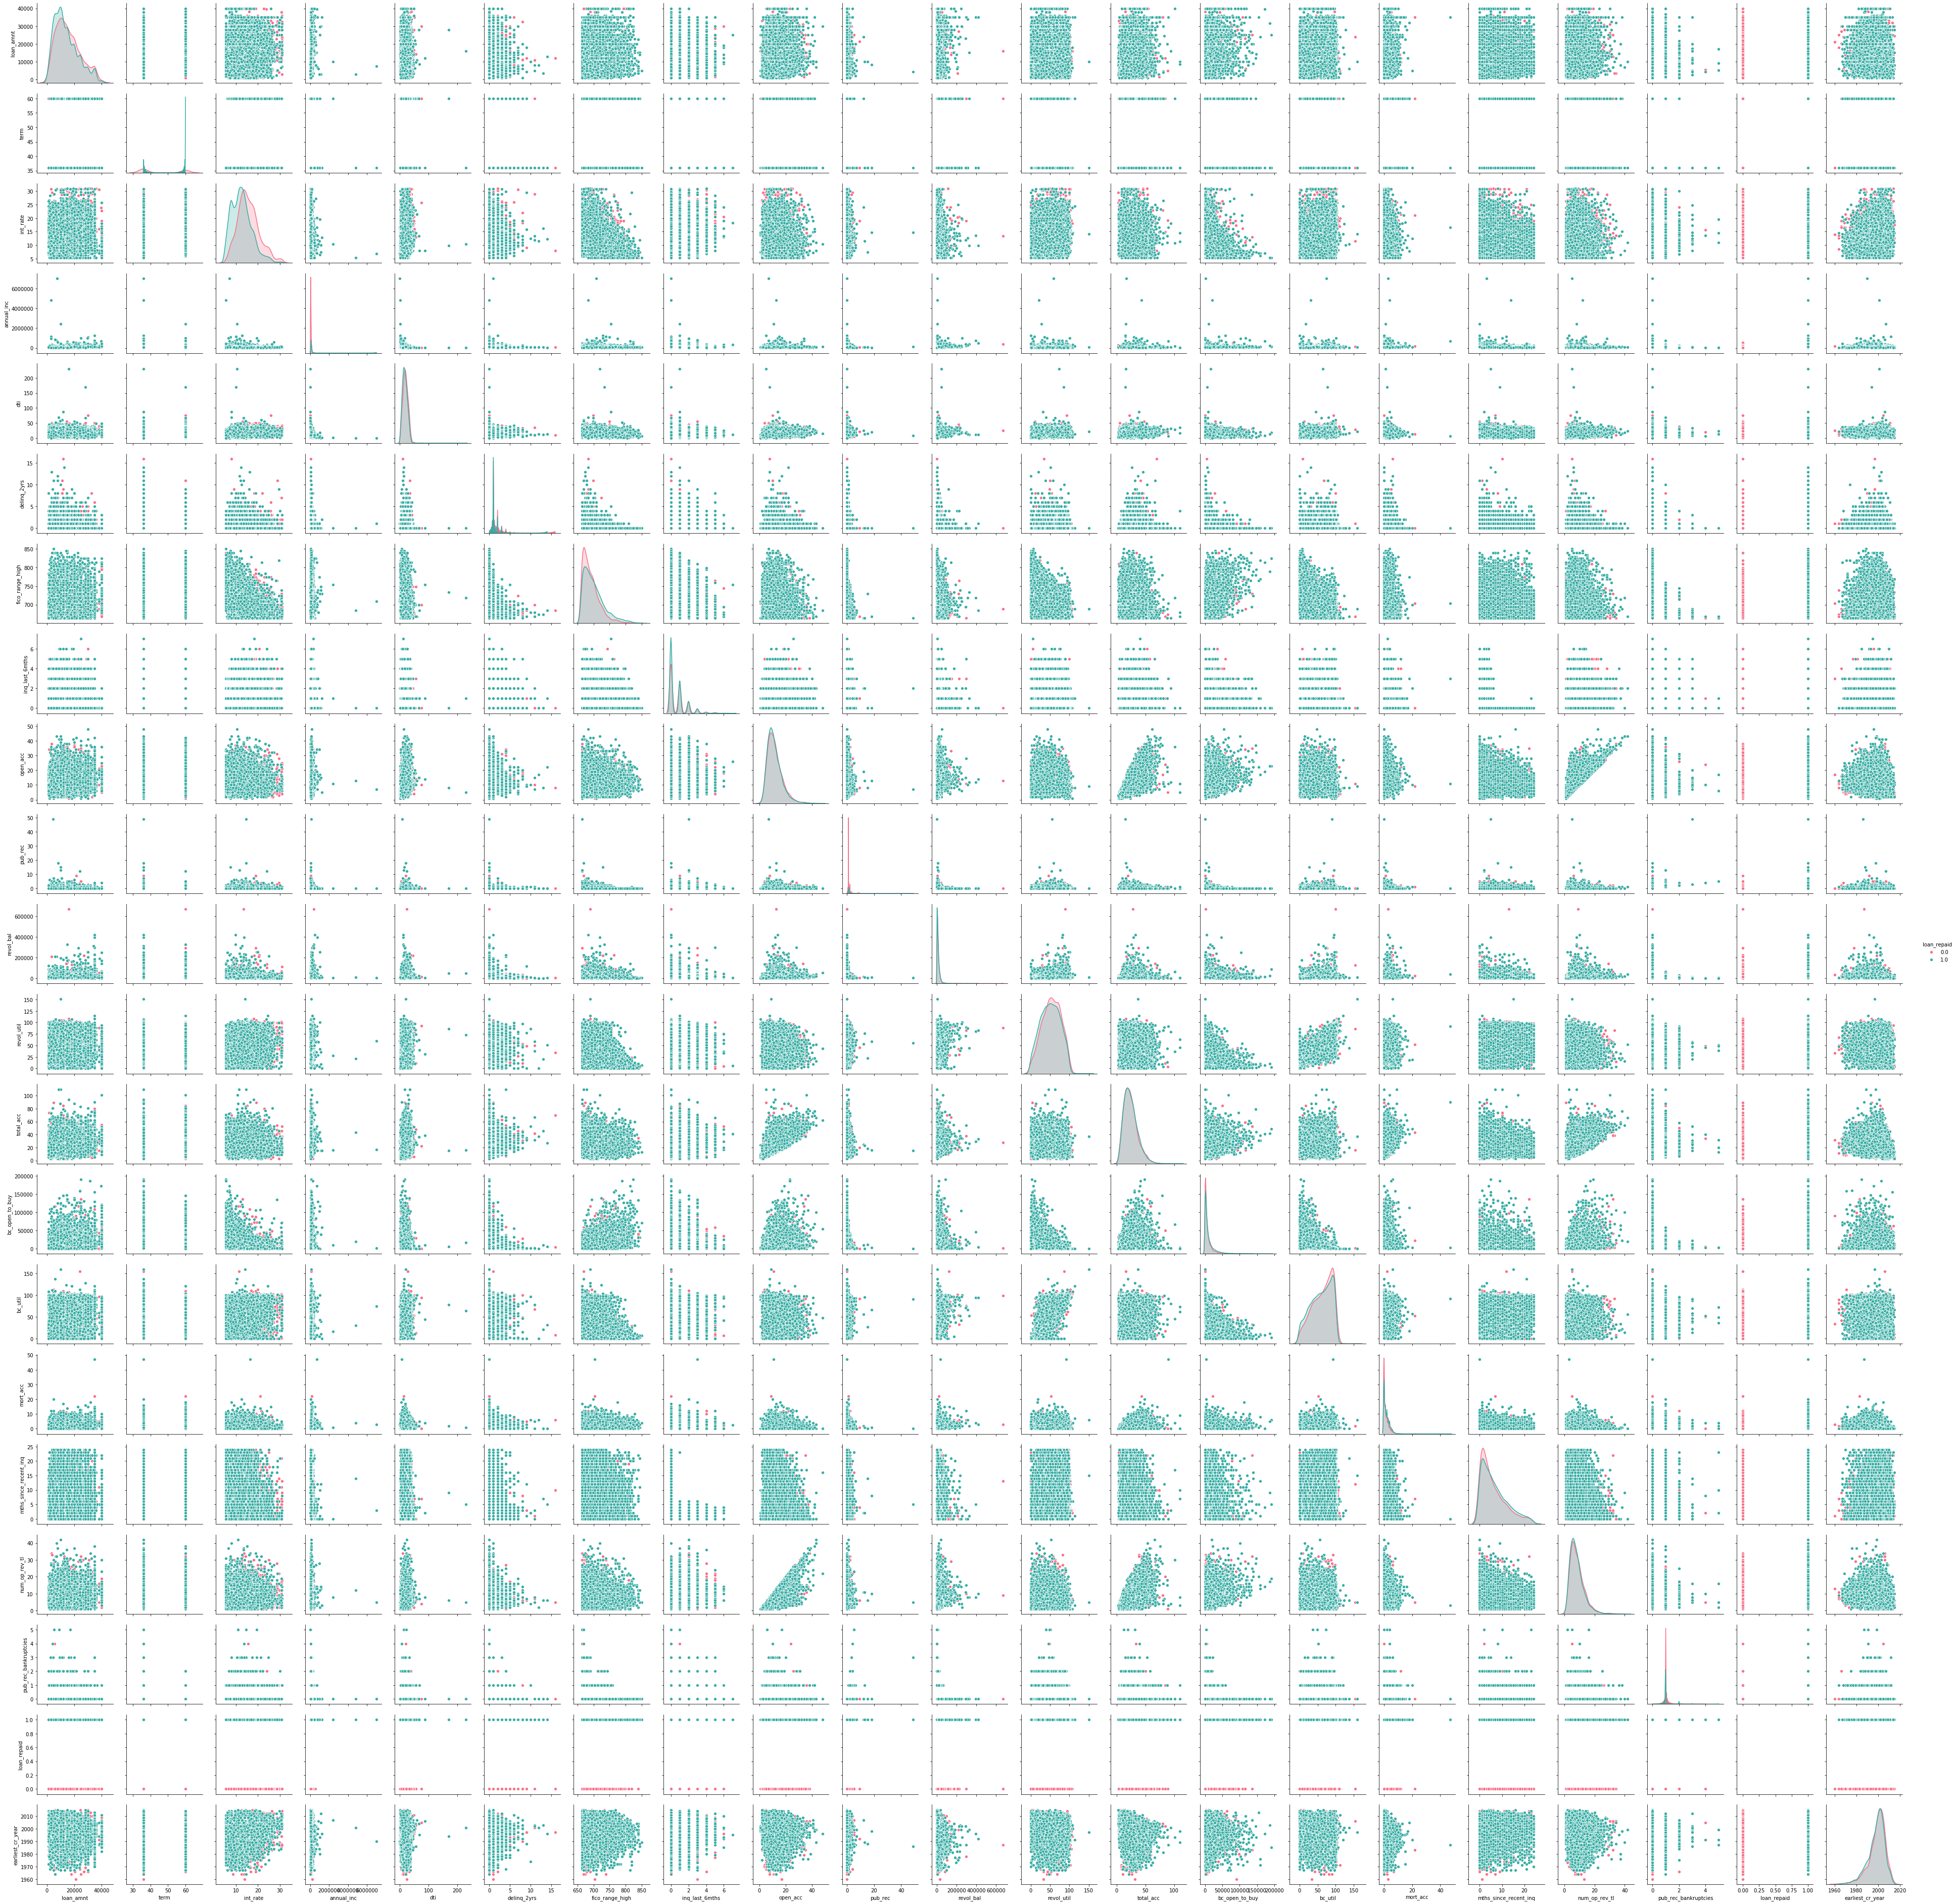

In [746]:
##Distributions and scatter plots, using loan_repaid as the hue variable
sns.pairplot(df,hue='loan_repaid',palette="husl")

In [747]:
#Continuous Variables over Purpose (Categorical)
df1=df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False)
df2=df.groupby('purpose')['annual_inc'].mean().sort_values(ascending=False)
df3=df.groupby('purpose')['fico_range_high'].mean().sort_values(ascending=False)
df4=df.groupby('purpose')['total_acc'].mean().sort_values(ascending=False)

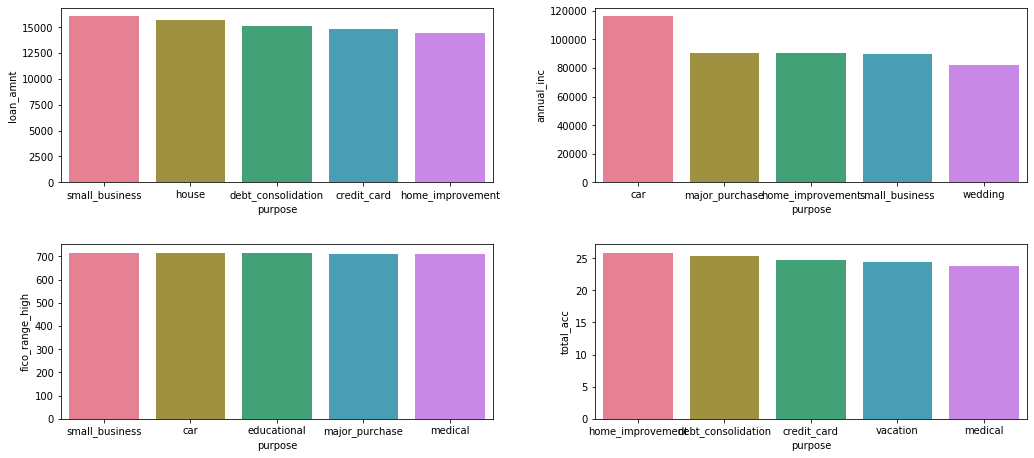

In [748]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
g=sns.barplot(ax=axes[0][0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[0][1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[1][0],x=df3[:5,].index,y=df3[:5,], palette="husl")
sns.barplot(ax=axes[1][1],x=df4[:5,].index,y=df4[:5,], palette="husl")
plt.tight_layout(3.0)

For every category, loan_amnt is around 15K, annual_inc between 80K and 110K, fico_range_high around 700 and total_acc between 23 and 25.

### Correlation Check

The first step is to check the correlation relationship between each variable, as it can also help in predicting one attribute from another.


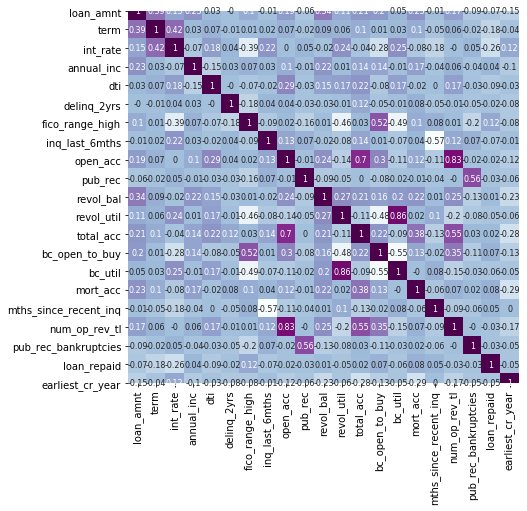

In [749]:
corr_df = df.iloc[:, :].corr().round(2) # rounding to 1 decimal point to make it easier to observe correlated features
plt.figure(figsize=(7, 7))
sns.heatmap(corr_df, cmap='BuPu',annot=True, square=True, annot_kws=dict(size=8), cbar=False)
plt.show()

According to this plot, there are no highest correlated variables, so multicollinearity will not be an issue for this moment.

### Imbalanced Data

Classification problems in most real-world applications have imbalanced data sets.  In otherwords, the one class examples (minority class) are a lot less than another (majority class).It is common to see that in spam detection, ads click, customer churn, etc.

Let's try this problem with sample method later when models are applied.

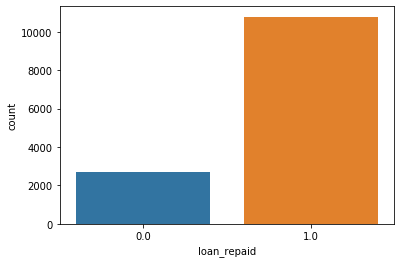

In [750]:
sns.countplot(df['loan_repaid'])

In [751]:
df['loan_repaid'].value_counts()

1.0    10779
0.0     2699
Name: loan_repaid, dtype: int64

# 5. Modeling

### Categorical Feature Transformation

In [752]:
dummies = pd.get_dummies(df[['sub_grade','verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = df.drop(['sub_grade','verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [753]:
#map none and any to other, then transform to dummy
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13478 entries, 694363 to 163701
Data columns (total 75 columns):
loan_amnt                              13478 non-null float64
term                                   13478 non-null int64
int_rate                               13478 non-null float64
annual_inc                             13478 non-null float64
dti                                    13478 non-null float64
delinq_2yrs                            13478 non-null float64
fico_range_high                        13478 non-null float64
inq_last_6mths                         13478 non-null float64
open_acc                               13478 non-null float64
pub_rec                                13478 non-null float64
revol_bal                              13478 non-null float64
revol_util                             13478 non-null float64
total_acc                              13478 non-null float64
bc_open_to_buy                         12929 non-null float64
bc_util            

### Train and Test split for unbalanced dataset

In [755]:
X = df.drop(['loan_repaid'], axis=1)
y = df['loan_repaid']
print(X.shape)
print(y.shape)

(13478, 74)
(13478,)


In [756]:
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=1)

### Train and Test split for balanced dataset

In [757]:
#fractions = {"False": 1.0, "True": 0.2523}
loan_DF = df[df['loan_repaid']==1].sample(frac=0.25, replace=True, random_state=1)
loan_DF1= df[df['loan_repaid']==0]
df_balanced=pd.concat([loan_DF,loan_DF1],ignore_index=True)

In [758]:
df_balanced['loan_repaid'].value_counts()

0.0    2699
1.0    2695
Name: loan_repaid, dtype: int64

In [759]:
# Separate features and target
X = df_balanced.drop(['loan_repaid'], axis = 1)
y = df_balanced['loan_repaid']

print(X.shape)
print(y.shape)

(5394, 74)
(5394,)


In [760]:
X_train_bal, X_test_bal,y_train_bal,y_test_bal=train_test_split(X,y,stratify=y, random_state=2)

Before starting looking for the best model and hyperparameters, it is important to make it clear that for this loan repayment problem, one of the most important metrics to evaluate models performance is precision. Since I am looking for the best model that predicts loan repayment, my false positives need to be low, so precision is the right metric to look into.

## Logistic Regression

My pipeline uses transformers like SimpleImputer (for imputing NA) and StandardScaler(to standarize training dataset ) and then call the estimator (logisticregresion) with a grid seach to look for the best hyperparameters.

Doing this way, transformers are called only once, for one call to pipe_lr.fit, instead of multiple calls, for better computation.

In [761]:
##Every distributions is close to normal so let's use StandardScaler to standarize the data. 
grid_lr=GridSearchCV(LogisticRegression(solver='lbfgs', penalty='l2', random_state=2),
                                   param_grid={'C':np.logspace(-3,3,7)},
                                   cv=10, 
                                   refit=True)

pipe_lr=make_pipeline(SimpleImputer(strategy='median'),StandardScaler(),
                      grid_lr)

In [762]:
#Normalizing / scaling the data
#We scale the feature data. To prevent data leakage from the test set, we only fit our scaler 
#to the training set.

pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           du...
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                     

In [763]:
print('Score on training data: ', pipe_lr.score(X_train, y_train))
print('Score on test data: ', pipe_lr.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("Best_score :",grid_lr.best_score_)

Score on training data:  0.80599525128611
Score on test data:  0.7973293768545994
Tuned hyperparameters :(best parameters)  {'C': 0.1}
Best_score : 0.8022358527898694


In [764]:
predictions=pipe_lr.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[2644   51]
 [ 632   43]]


In [765]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.80
Precision score: 0.81
Recall score: 0.98
F1 score: 0.89


### Balanced Dataset

In [766]:
pipe_lr.fit(X_train_bal, y_train_bal)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           du...
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                     

In [767]:
print('Score on training data: ', pipe_lr.score(X_train_bal, y_train_bal))
print('Score on test data: ', pipe_lr.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("Best_score :",grid_lr.best_score_)

Score on training data:  0.6640296662546353
Score on test data:  0.6278724981467754
Tuned hyperparameters :(best parameters)  {'C': 0.01}
Best_score : 0.6548825710754017


In [768]:
predictions=pipe_lr.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[435 239]
 [263 412]]


In [769]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.63
Precision score: 0.62
Recall score: 0.65
F1 score: 0.63


Balanced dataset offers poor performance on Logistic Regression model.

## K Nearest Neighbor

My pipeline uses transformers like SimpleImputer (Mean for imputing NA) and StandardScaler(to standarize training dataset ) and then call the estimator (KNeighborsClassifier) with a grid seach to look for the best hyperparameters.

Doing this way, transformers are called only once, for one call to pipe_knn.fit, instead of multiple calls, for better computation.

In [773]:
grid_knn=GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors': np.arange(1,30,2)},cv=5, refit=True)
pipe_knn=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(),
                       grid_knn)

In [774]:
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights

In [775]:
print('Score on training data: ', pipe_knn.score(X_train, y_train))
print('Score on test data: ', pipe_knn.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)
print("Best_score :",grid_knn.best_score_)

Score on training data:  0.8061931143648595
Score on test data:  0.7934718100890208
Tuned hyperparameters :(best parameters)  {'n_neighbors': 19}
Best_score : 0.7966956865848832


In [776]:
predictions=pipe_knn.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[2646   49]
 [ 647   28]]


In [777]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.79
Precision score: 0.80
Recall score: 0.98
F1 score: 0.88


I don't show results on balanced dataset, as they have signs of under performance as in Logistic Regression. I should apply other method of balancing data.

# SVC

My pipeline uses transformers like SimpleImputer (Mean for imputing NA), StandardScaler(to standarize training dataset ) and PCA (for dimension reduction), then call the estimator (SVC) with a grid seach to look for the best hyperparameters.

Doing this way, transformers are called only once, for one call to svc_knn.fit, instead of multiple calls, for better computation.

In [780]:
grid_svc=GridSearchCV(SVC(random_state=2),param_grid={'C':np.logspace(-3,2,6), 'gamma':np.logspace(-3,2,6)/X_train.shape[0]},cv=10)
pipe_svc=make_pipeline(SimpleImputer(strategy='median'),StandardScaler(), PCA(n_components=10),
                       grid_svc)

In [781]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gr...
                                            probability=False, random_state=2,
                                            shrinking=True, tol=0.001,
                                            verbose=False),
                              iid='warn', n_jobs=None,
                              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                          'ga

In [783]:
print('Score on training data: ', pipe_svc.score(X_train, y_train))
print('Score on test data: ', pipe_svc.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_svc.best_params_)
print("Best_score :",grid_svc.best_score_)

Score on training data:  0.807578155916106
Score on test data:  0.7979228486646884
Tuned hyperparameters :(best parameters)  {'C': 100.0, 'gamma': 0.009893153937475268}
Best_score : 0.8005540166204986


In [784]:
predictions=pipe_svc.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[2683   12]
 [ 669    6]]


In [785]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.80
Precision score: 0.80
Recall score: 1.00
F1 score: 0.89


I don't show results on balanced dataset, as they have signs of under performance as in Logistic Regression and KNN. I should apply other method of balancing data.

# Random Forest

In [786]:
##Don't use transformers in Random Forest

model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

# create random forest classifier model
rf_model = RandomForestClassifier(random_state=2)

# set up grid search meta-estimator
grid_rf = GridSearchCV(rf_model, model_params, cv=5)

pipe_rf = make_pipeline(SimpleImputer(strategy='median'),
                        grid_rf)

In [788]:
# train the grid search meta-estimator to find the best model
pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nod...
                                                               min_weight_fraction_leaf=0.0,
                                                               n_estima

In [789]:
print('Score on training data: ', pipe_rf.score(X_train, y_train))
print('Score on test data: ', pipe_rf.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_rf.best_params_)
print("Best_score :",grid_rf.best_score_)

Score on training data:  1.0
Score on test data:  0.8014836795252226
Tuned hyperparameters :(best parameters)  {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
Best_score : 0.8017411950929957


In [790]:
predictions=pipe_rf.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[2670   25]
 [ 644   31]]


In [791]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.80
Precision score: 0.81
Recall score: 0.99
F1 score: 0.89


This model is overfitting, so it is not a good choice, eventhough I got a higher precision of 0.81

# CatBoostClassifier

CatBoost is based on gradient boosting. 

In [792]:
n = y_train.value_counts()
model = CatBoostClassifier(learning_rate=0.03,
                           iterations=1000,
                           early_stopping_rounds=100,
                           class_weights=[1, n[0] / n[1]],
                           verbose=False,
                           random_state=0)


pipe_cat=Pipeline([('imputer',SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                      ('model', model)])




In [793]:
pipe_cat.fit(X_train, y_train)
#pipe_cat.named_steps['model'].feature_names_

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fa364991cd0>)],
         verbose=False)

In [794]:
predictions=pipe_cat.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[1848  847]
 [ 280  395]]


In [799]:
print('Score on training data: ', pipe_cat.score(X_train, y_train))
print('Score on test data: ', pipe_cat.score(X_test, y_test))

Score on training data:  0.7439651760981401
Score on test data:  0.6655786350148368


In [795]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.67
Precision score: 0.87
Recall score: 0.69
F1 score: 0.77


In [796]:
feat = model.feature_names_
imp = model.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:15]
#sns.barplot(x='Importance', y='Feature', data=df);
df

Feature  Importance
2        2   16.876142
0        0    7.470707
3        3    7.397063
4        4    6.829384
10      10    6.341633
14      14    5.722541
13      13    5.125054
11      11    4.335728
15      15    4.269594
12      12    4.107039
6        6    3.965015
19      19    3.214540
17      17    3.155486
16      16    2.865180
8        8    2.656261

### Conclusions

#### Highest Accuracy score: 0.80

Unbalanced Dataset

Algorithm: Logistic Regresion and SVC

Parameters: Logistic Regresion: {'C': 0.1}, SVC: {'C': 100.0, 'gamma': 0.009893153937475268}


Even though this model shows the highest accuracy, as the company needs to address the loan repayment problem, accuracy is not the metric I need to look into.

A high false positives mean I predict a borrower who can pay the loan off, but in the end, the credit was not paid, an error that could cost much money. So, to address this problem, I should look into factors that drive a low false positives, and lead us to a high precision, the key metric to analyze for this loan repayment study.


#### Highest Precision score: 0.87

Unbalanced Dataset

Algorithm: CatBoost


This model has the highest Precision, it means lower False Positive, what I was looking for, but I created an overfitted model, with a training score of 0.74, and test score of 0.66.

So next steps to correct this model are parameter tuning, and working on outliers.

